In [1]:
import pickle as cp
import numpy as np
X, y = cp.load(open('resources/winequality-white.pickle', 'rb'), encoding='latin1')


In [2]:
N, D = X.shape
N_train = int(0.8 * N)
N_test = N - N_train
X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

In [3]:
len(y)


4898

In [4]:
X

array([[ 7.6 ,  0.24,  0.44, ...,  3.06,  0.37, 11.6 ],
       [ 6.9 ,  0.41,  0.33, ...,  3.2 ,  0.52,  9.4 ],
       [10.  ,  0.2 ,  0.39, ...,  3.  ,  0.42, 10.4 ],
       ...,
       [ 6.3 ,  0.48,  0.04, ...,  3.24,  0.36,  9.6 ],
       [ 5.8 ,  0.13,  0.22, ...,  3.32,  0.42, 11.7 ],
       [ 7.8 ,  0.32,  0.33, ...,  3.07,  0.58,  9.6 ]])

In [5]:
from collections import Counter

In [6]:
Counter(y)

Counter({3.0: 20, 4.0: 163, 5.0: 1457, 6.0: 2198, 7.0: 880, 8.0: 175, 9.0: 5})

In [7]:
import matplotlib.pyplot as plt

<Container object of 7 artists>

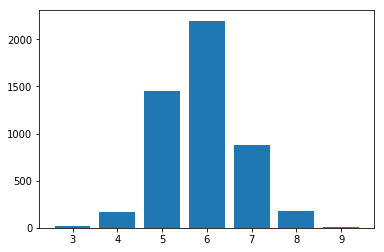

In [8]:
performance = Counter.values(Counter(y))
y_pos = Counter.keys(Counter(y))

plt.bar(y_pos, performance, align='center', alpha=1)

In [9]:
average_y = np.mean(y_train)

In [10]:
def squared_error(average, vector):
    return [(el - average)**2 for el in vector]

In [11]:
len(squared_error(average_y, y))

4898

In [12]:
def mean_squared_error(vector):
    return sum([el for el in squared_error(average_y,vector)])/len(vector)
  

In [13]:
mean_squared_error(y_test)

0.8138573000045545

In [14]:
def standartization(X):
    transp = X.T
    for column in transp:
        min_element=min(column)
        max_element=max(column)
        index = 2/(max_element-min_element)
        for indx, el in enumerate(column):
            column[indx] = (el-min_element)*index-1
    X=transp.T
    return X


In [15]:
standartization(X)


array([[-0.26923077, -0.68627451, -0.46987952, ..., -0.38181818,
        -0.65116279,  0.16129032],
       [-0.40384615, -0.35294118, -0.60240964, ..., -0.12727273,
        -0.30232558, -0.5483871 ],
       [ 0.19230769, -0.76470588, -0.53012048, ..., -0.49090909,
        -0.53488372, -0.22580645],
       ...,
       [-0.51923077, -0.21568627, -0.95180723, ..., -0.05454545,
        -0.6744186 , -0.48387097],
       [-0.61538462, -0.90196078, -0.73493976, ...,  0.09090909,
        -0.53488372,  0.19354839],
       [-0.23076923, -0.52941176, -0.60240964, ..., -0.36363636,
        -0.1627907 , -0.48387097]])

In [16]:
X

array([[-0.26923077, -0.68627451, -0.46987952, ..., -0.38181818,
        -0.65116279,  0.16129032],
       [-0.40384615, -0.35294118, -0.60240964, ..., -0.12727273,
        -0.30232558, -0.5483871 ],
       [ 0.19230769, -0.76470588, -0.53012048, ..., -0.49090909,
        -0.53488372, -0.22580645],
       ...,
       [-0.51923077, -0.21568627, -0.95180723, ..., -0.05454545,
        -0.6744186 , -0.48387097],
       [-0.61538462, -0.90196078, -0.73493976, ...,  0.09090909,
        -0.53488372,  0.19354839],
       [-0.23076923, -0.52941176, -0.60240964, ..., -0.36363636,
        -0.1627907 , -0.48387097]])

In [17]:
weights=np.array([1,-1,0,-2,2,-1,0,2,0,-1,1,0])

In [18]:
from sympy import *
def squared_error(average, vector):
    return [(el - average)**2 for el in vector]
def mean_squared_error_loss(hat, vector):
    return sum([el for el in squared_error(hat, vector)])/(2*len(vector) )
    

In [19]:
weights[1:].T

array([-1,  0, -2,  2, -1,  0,  2,  0, -1,  1,  0])

In [20]:
def hats(weight_vector, X_matrix):
    hats_vector = np.dot(X_matrix,weight_vector[1:])
    return hats_vector

In [21]:
hats(weights, X)
#len(hats(weights, X))


array([-0.75874617,  0.14180042, -1.04313887, ..., -0.55067082,
        0.52585061,  0.82403472])

In [22]:
def loss(y_vector, x_matrix, weights):
    hats_vector = hats(weights, X)   #(4898,1)
    error_rate = 0
    for index, el in enumerate(y_vector):   # for el in y(4898,1)
        diff_square = (hats_vector[index]-el)**2        
        error_rate += diff_square
    return error_rate/(2*len(y_vector))

In [23]:
loss(y,X,weights)


19.663459892434

In [24]:
def df_dx(y,X,weights,index):
    h = 0.5
    current = loss(y,X,weights)
    weights_=np.append(weights[:index],weights[index]+h)
    weights_ = np.append(weights_,weights[index+1:])
    next_ = loss(y,X,weights_)
    #print('index:' + str(index)    +' weights: ' + str(weights_[index]))
    return (next_-current)/h


In [25]:

def simplify(weights):
    weights_new = np.array([])
    for index, el in enumerate(weights):
        weights_new = np.append(weights_new, weights[index] - 0.5*df_dx(y,X,weights, index))
    return weights_new

In [26]:
def train_weights(y_vector, x_matrix, weights):
    index = 0
    #print(len(weights))
    while True:
        current_loss = loss(y_vector, x_matrix, weights)
        for index, el in enumerate(simplify(weights)):
            weights[index]=el
        
        #print ( "weights:  " + str(weights))
        
        next_loss = loss(y_vector, x_matrix, weights)
        #print("***loss:"+str(next_loss))
        index+=1
        if(0.5 >= next_loss or index>10):
            break;
    #print(weights)
    return current_loss

In [27]:
import matplotlib.pyplot as plt

In [28]:
data_part=np.arange(0.05, 1, 0.05)
len(data_part)
train_value=np.array([])
test_value=np.array([])
data_part

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [35]:
# def curve_values(data_part, y_train, y_test, X_train, X_test):
weights=np.array([1.,1.,1.,-1.4,1.,-1.,0.1,2,.3,.1,4.1,0.8])
train_value=np.array([])
test_value=np.array([])
for index, el in enumerate(data_part):
    train_error=train_weights(y_train, X_train[:int(len(X_train)*el)], weights)
    test_error=loss(y_test, X_test[:int(len(X_test)*el)], weights)
    train_value = np.append(train_value,train_error)
    test_value = np.append(test_value, test_error)
    if(train_error==test_error):
        break;
print(train_value)

#train_value

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
[40.72986677 32.49616404 21.82480438 17.99291092 11.77808913 10.14713356
  6.45072265  5.88436654  3.63373517  3.55423602  2.14931901  2.26974252
  1.37028395  1.5533686   0.9632344   1.14745366  0.75137286  0.91253334
  0.6412526 ]


In [30]:
#curve_values(data_part, y_train, y_test, X_train, X_test)

12
[40.72986677]
12
[40.72986677 32.49616404]
12
[40.72986677 32.49616404 21.82480438]
12
[40.72986677 32.49616404 21.82480438 17.99291092]
12
[40.72986677 32.49616404 21.82480438 17.99291092 11.77808913]
12
[40.72986677 32.49616404 21.82480438 17.99291092 11.77808913 10.14713356]
12
[40.72986677 32.49616404 21.82480438 17.99291092 11.77808913 10.14713356
  6.45072265]
12
[40.72986677 32.49616404 21.82480438 17.99291092 11.77808913 10.14713356
  6.45072265  5.88436654]
12
[40.72986677 32.49616404 21.82480438 17.99291092 11.77808913 10.14713356
  6.45072265  5.88436654  3.63373517]
12
[40.72986677 32.49616404 21.82480438 17.99291092 11.77808913 10.14713356
  6.45072265  5.88436654  3.63373517  3.55423602]
12
[40.72986677 32.49616404 21.82480438 17.99291092 11.77808913 10.14713356
  6.45072265  5.88436654  3.63373517  3.55423602  2.14931901]
12
[40.72986677 32.49616404 21.82480438 17.99291092 11.77808913 10.14713356
  6.45072265  5.88436654  3.63373517  3.55423602  2.14931901  2.26974252

In [31]:
len(data_part)

19

In [36]:
len(train_value)

19

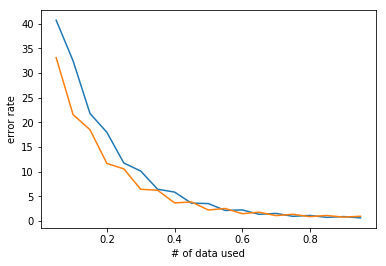

In [37]:
plt.xlabel('# of data used')
plt.ylabel('error rate')
plt.plot(data_part, train_value)
plt.plot(data_part, test_value)

In [35]:
train_value

array([], dtype=float64)

In [ ]:
weights

In [36]:
loss(y_test, X_test, weights) 

19.49685439024583